# Μέρος 2. Kaggle dataset - K01: Rain in Australia

## Εισαγωγή και επισκόπηση

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data=pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

### **Σύντομη παρουσίαση του dataset δηλαδή ποιο είναι το πρόβλημα που περιγράφει.**

Το συγκεκριμένο dataset αποτελείται από ένα σύνολο μετεωρολογικών δεδομένων από 10 χρόνια καθημερινών καιρικών παρατηρήσεων από πολλές τοποθεσίες σε όλη την Αυστραλία. Κάθε στήλη του πίνακα αφορά μία συγκεκριμένη μετεωρολογική μέτρηση (και όχι μόνο) και κάθε γραμμή αντιστοιχεί σε μία από τις καθημερινές 145460 καταγραφές μετεωρολογικών δεδομένων. 

Στόχος των δεδομένων είναι η πρόβλεψη για την πιθανότητα ή όχι βροχής την αυριανή ημέρα, η οποία δίνεται με τη μορφή της στήλης "RainTomorrow", η οποία περιέχει την τιμή No για αρνητική πρόβλεψη βροχής (λιγότερο από 1mm νερού για την συγκεκριμένη ημέρα) και την τιμή Yes θετική πρόβλεψη βροχής την αυριανή ημέρα.

Τα δεδομένα είναι σε μορφή ASCII CSV. Οι γράμμες του αρχείου CSV περιλαμβάνουν ένα στιγμιότυπο που αντιστοιχεί στα δεδομένα μίας ημέρας. 

### **Χρειάστηκε να κάνετε μετατροπές στα αρχεία plain text για την εισαγωγή του; αν ναι, ποιες είναι αυτές;**

Δεν χρειάστηκε κάποια μετατροπή για την εισαγωγή του dataset.

### **Δώστε το πλήθος δειγμάτων και χαρακτηριστικών, και το είδος όλων των χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;**
Το dataset αποτελείται από 145460 δείγματα μετεωρολογικών δεδομένων και το πλήθος των χαρακτηριστικών που περιλαμβάνει είναι 23. 

Τα χαρακτηριστικά είναι τα εξής: 
Date - Η ημέρα της παρατήρησης

Location - Η ονομασία της τοποθεσίας του μετεωρολογικού σταθμού

MinTemp - Η ελάχιστη θερμοκρασία σε βαθμούς Κελσίου

MaxTemp - Η μέγιστη θερμοκρασία σε βαθμούς Κελσίου

Rainfall - Το ποσό της βροχόπτωσης που καταγράφηκε για την ημέρα σε mm

Evaporation - Η λεγόμενη εξάτμιση Κατηγορίας Α (mm) το 24ωρο έως τις 9 π.μ

Sunshine - Ο αριθμός των ωρών με έντονη ηλιοφάνεια μέσα στην ημέρα

WindGustDir - Η κατεύθυνση της ισχυρότερης ριπής ανέμου το 24ωρο έως τα μεσάνυχτα

WindGustSpeed - Η ταχύτητα (km/h) της ισχυρότερης ριπής ανέμου τις 24 ώρες έως τα μεσάνυχτα

WindDir9am - Διεύθυνση του ανέμου στις 9 π.μ

WindDir3pm - Διεύθυνση ανέμου στις 3 μ.μ

WindSpeed9am - Η μέση ταχύτητα του ανέμου (km/hr) 10 λεπτά πριν από τις 9 π.μ

WindSpeed3pm - Η μέση ταχύτητα του ανέμου (km/hr) 10 λεπτά πριν από τις 3 μ.μ

Humidity9am - Υγρασία (ποσοστό) στις 9 π.μ

Humidity3pm - Υγρασία (ποσοστό) στις 3 μ.μ

Pressure9am - Η ατμοσφαιρική πίεση (hpa) μειωμένη στη μέση στάθμη της θάλασσας στις 9 π.μ

Pressure3pm - Η ατμοσφαιρική πίεση (hpa) μειωμένη στη μέση στάθμη της θάλασσας στις 3 μ.μ

Cloud9am - Κλάσμα του ουρανού που κρύβεται από σύννεφο στις 9 π.μ. Αυτό μετριέται σε «όγδοα». Καταγράφει πόσα όγδοα του ουρανού καλύπτονται από σύννεφα. Το μέτρο 0 δείχνει εντελώς καθαρό ουρανό ενώ το 8 δείχνει ότι είναι εντελώς συννεφιασμένος

Cloud3pm - Κλάσμα του ουρανού που καλύπτεται από σύννεφο σε όγδοα στις 3 μ.μ.

Temp9am - Θερμοκρασία (βαθμοί C) στις 9 π.μ

Temp3pm - Θερμοκρασία (βαθμοί C) στις 3 μ.μ

RainToday - Boolean: 1 εάν η βροχόπτωση (mm) τις 24 ώρες έως τις 9 π.μ. υπερβαίνει το 1 mm, διαφορετικά 0

RainTomorrow - Η ποσότητα της βροχής της επόμενης ημέρας σε mm. Χρησιμοποιείται για τη δημιουργία μεταβλητής απόκρισης RainTomorrow. Ένα είδος μέτρου του «ρίσκου».


Υπάρχουν στο dataset μη διατεταγμένα χαρακτηριστικά. Αυτά είναι τα Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow.

### **Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**
Σε κάθε στήλη υπάρχει επικεφαλίδα που αντιστοιχεί στο όνομα του χαρακτηριστικού που αφορά η στήλη και οι γραμμές είναι αριθμημένες από το 0 έως το 145459 (145460 δείγματα μετεωρολογικών δεδομένων από παρατηρήσεις).

### **Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**
Οι ετικέτες των κλάσεων παίρνουν τιμές "No" και "Yes"  και βρίσκονται στη στήλη RainTomorrow που είναι η στήλη 22 (μετρώντας από τη στήλη 0).

### **Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Υπάρχουν απουσιάζουσες τιμές στο σύνολο δεδομένων, δηλαδή αρκετές παρατηρήσεις (γραμμές του dataset) στις οποίες κάποια χαρακτηριστικά έχουν τιμή NA, δηλαδή Not Applicable. 

Γνωρίζουμε ότι για παράδειγμα έχουμε 1% NA στο χαρακτηριστικό MinTemp,  1% στο MaxTemp, 43% NA στο Evaporation, 48% στο Sunshine, 7% στα WindGustDir, WindGustSpeed, WindDir9am, 3% στο Humidity3pm, 10% στα Pressure9am και Pressure3pm, 38% στο Cloud9am, 41% στο Cloud3pm, 1% στο Temp9am, 2% στο Temp3pm, καθώς και 2% στα RainToday. και RainTomorrow.

Παρακάτω φαίνεται πόσα είναι τα δείγματα με απουσιάζουσες τιμές σε κάθε χαρακτηριστικό και στη συνέχεια το ποσοστό των τιμών που απουσιάσζουν επί του συνόλου.

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count[0:23]

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

In [ ]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

10.259745694319072


10.26% των δεδομένων απουσιάζουν

### **Ποιο είναι το πλήθος των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε αν το dataset είναι ισορροπημένο ή όχι.**

Υπάρχουν 2 κλάσεις στο συγκεκριμένο dataset ("Yes" και "No"). Από τις 145k παρατηρήσεις που εξετάζει το dataset, το 76% ανήκουν στην κλάση "No" και το 22% ανήκουν στην κλάση "Yes" (2% είναι NA).
Το dataset **δεν είναι ισορροπημένο**, καθώς τα δείγματα της κλάσης "No" είναι πάνω από τριπλάσια από αυτά της κλάσης μειοψηφίας ("No").

## Προετοιμασία των δεδομένων

Επειδή έχουμε χαρακτηριστικά με μεγάλο ποσοστό missing values, καθώς και γραμμές με μεγάλο ποσοστο missing values, προτού αντικαταστήσουμε τις NA τιμές, θα κάνουμε πρώτα drop όσα χαρακτηριστικά έχουν πάνω από 35% NA, δηλαδή δεν έχουν ουσιαστική πληροφορία να προσφέρουν και αντίστοιχα όσες γραμμές έχουν αυτό το ποσοστό από NA τιμές.

In [ ]:
after_dropping_columns = data.dropna(axis=1, thresh=94000)

In [ ]:
print(after_dropping_columns.head())

         Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3p

Πλέον έχουμε 19 columns. Επομένως για να απαλοίψουμε τις γραμμές που έχουν πάνω από 35% missing values, θα έχουμε threshold=12

In [ ]:
after_dropping_rows = after_dropping_columns.dropna(axis=0, thresh=12)

In [ ]:
print(after_dropping_rows)

              Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0           E   
145456  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
145457  2017-06-23    Uluru      5.4     26.9       0.0           N   
145458  2017-06-24    Uluru      7.8     27.0       0.0          SE   
145459  2017-06-25    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0 

In [ ]:
data=after_dropping_rows

Πλέον έχουμε 142753 γραμμές και 19 στήλες (χαρακτηριστικά).

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count[0:19]

Date                 0
Location             0
MinTemp            319
MaxTemp            282
Rainfall          2211
WindGustDir       8239
WindGustSpeed     8177
WindDir9am        8895
WindDir3pm        2257
WindSpeed9am       437
WindSpeed3pm      1105
Humidity9am       1362
Humidity3pm       2602
Pressure9am      12476
Pressure3pm      12459
Temp9am            492
Temp3pm           1712
RainToday         2211
RainTomorrow      2290
dtype: int64

In [ ]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

In [ ]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

2.4896149292834475


Από 10% missing values, τις περιορίσαμε στο 2.5% του dataset.

Σε αυτό το σημείο θα μετασχηματίσουμε τις ΝΑ τιμές που έχουν απομείνει. Για όλα τα κατηγορικά χαρακτηριστικά θα αντικαταστήσουμε τις NA τιμές με τη most_frequent τιμή του χαρακτηριστικού, ενώ για τα διατεταγμενα χαρακτηριστικά θα αντικαταστήσουμε τις NA τιμές με τη μέση τιμή.

Έχοντας προηγουμένως απαλείψει χαρακτηριστικά με πολλά missing values, τα οποία δεν προσέθεταν πολλή χρήσιμη πληροφορία στο dataset, από τα χαρακτηριστικά που έχουν απομείνει αρχικά εντοπίζουμε ποια είναι τα κατηγορικά.

In [ ]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


και στη συνέχεια ποια είναι τα διατεταγμένα χαρακτηριστικά

In [ ]:
numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 12
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


Κάνουμε drop τη στήλη της ημερομηνίας, καθώς δεν δίνει πληροφορία για την ταξινόμηση.

In [ ]:
data_new= data.drop(['Date'], axis=1)
data=data_new

In [ ]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Για τα κατηγορικά χαρακτηριστικά αντικαθιστούμε τις ΝΑ τιμές με τη συχνότερα εμφανιζόμενη:

In [ ]:
categorical_features_with_null = [feature for feature in categorical_features if data[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = data[each_feature].mode()[0]
    data[each_feature].fillna(mode_val,inplace=True)

Για τα διατεταγμένα με τη μέση τιμή mean:

In [ ]:
numerical_features_with_null = [feature for feature in numerical_features if data[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = data[feature].mean()
    data[feature].fillna(mean_value,inplace=True)

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count[0:19]

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

In [ ]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


Όπως φαίνεται παραπάνω, εξαλείψαμε όλες τις απουσιάζουσες τιμές του dataset.

Στη συνέχεια θα πρέπει να διαχειριστούμε τα κατηγορικά δεδομένα. Αρχικά για τα κρτηγορικά δεδομένα RainToday και RainTomorrow που έχουν binary τιμές και αποδίδονται από το dataset με "Yes" και "No", θα τα μετατρέψουμε σε τιμές 0 και 1. 

In [ ]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})

Στη συνέχεια θα διαχειριστούμε με τη μέθοδο **target encoding** τα κατηγορικά χαρακτηριστικά Location, WindGustDir, WindDir9am και WindDir3pm. Ο λόγος που δεν επιλέξαμε One-hot encoding είναι πως θα αυξάνονταν κατά πολύ οι διαστάσεις του dataset, καθώς υπάρχουν 17 μοναδικές τιμές που περιγράφουν την κατέθυνση του ανέμου και 49 μοναδικές τιμές που περιγράφουν την τοποθεσία.

In [ ]:
data["Location"] = data.groupby("Location")["RainTomorrow"].transform("mean")
data["WindGustDir"] = data.groupby("WindGustDir")["RainTomorrow"].transform("mean")
data["WindDir9am"] = data.groupby("WindDir9am")["RainTomorrow"].transform("mean")
data["WindDir3pm"] = data.groupby("WindDir3pm")["RainTomorrow"].transform("mean")
print(data)

        Location  MinTemp    MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0       0.203691     13.4  22.900000       0.6     0.258916      44.000000   
1       0.203691      7.4  25.100000       0.0     0.276151      44.000000   
2       0.203691     12.9  25.700000       0.0     0.230411      46.000000   
3       0.203691      9.2  28.000000       0.0     0.184842      24.000000   
4       0.203691     17.5  32.300000       1.0     0.258916      41.000000   
...          ...      ...        ...       ...          ...            ...   
145455  0.073436      2.8  23.400000       0.0     0.147078      31.000000   
145456  0.073436      3.6  25.300000       0.0     0.281822      22.000000   
145457  0.073436      5.4  26.900000       0.0     0.266790      37.000000   
145458  0.073436      7.8  27.000000       0.0     0.184314      28.000000   
145459  0.073436     14.9  23.228936       0.0     0.258916      40.010358   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Hum

Στο σημείο αυτό θα χωρίσουμε το dataset σε train και test set.

In [ ]:
from sklearn.model_selection import train_test_split
labels = data.loc[:,'RainTomorrow']
features = data.drop(['RainTomorrow'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)


## Ταξινόμηση

### Out-of-the-box προσέγγιση

Για την αξιολόγηση των μοντέλων μας θα χρησιμοποιήσουμε τις μετρικές **Accuracy** και **Area Under the ROC Curve (AUC)**.

Η ακρίβεια (accuracy) μπορεί να χρησιμοποιηθεί ως παράμετρος αξιολόγησης, όμως αν υπάρχει ανισορροπία μεταξύ των κλάσεων, όπως στο συγκεκριμένο σύνολο δεδομένων, η ακρίβεια δεν αποτελεί την καταλληλότερη μετρική για την αξιολόγηση. Ένα καλύτερο μέτρο απόδοσης σε μη ισορροπημένα σύνολα δεδομένων είναι η Area Under ROC Curve (AUC). Το AUC αποτελεί σε αυτή την περίπτωση ένα στατιστικά πιο συνεπές μέτρο από την ακρίβεια και χρησιμοποιείται ευρέως για την αξιολόγηση της επίδοσης προγνωστικών μοντέλων.

Η καμπύλη ROC μπορεί ποσοτικά να συνοψιστεί χρησιμοποιώντας το AUC. Η καμπύλη ROC δείχνει το trade-off μεταξύ του ποσοστού των True Positive αποτελεσμάτων (ευαισθησία) και του ποσοστού των True Negative αποτελεσμάτων (1 - ειδικότητα) του ταξινομητή. 

Η περιοχή κάτω από την καμπύλη ROC (AUC) συσχετίζει το ποσοστό επιτυχίας με το ποσοστό False Positive αποτελεσμάτων και αποτελεί μια εκτίμηση της πιθανότητας ότι ένας ταξινομητής θα κατατάξει ένα τυχαία επιλεγμένο θετικό δείγμα υψηλότερα από ένα τυχαία επιλεγμένο αρνητικό δείγμα, αντιπροσωπεύει, δηλαδή, την ποιότητα της κατάταξης τυχαίων θετικών δειγμάτων έναντι των τυχαίων αρνητικών δειγμάτων.

#### **Ταξινομητές Dummy**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
from sklearn import metrics

In [ ]:
classifiers_accuracy = {}
classifiers_auc = {}
classifiers_time = {}

##### Dummy Classifier με strategy=uniform

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
start_time = time.time()

model = dc_uniform.fit(X_train, y_train)
preds = dc_uniform.predict(X_test)

classifiers_time['Uniform (random)'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

classifiers_accuracy['Uniform (random)'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
classifiers_auc['Uniform (random)'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds),'\n')
print("Uniform (random) AUC Score:",metrics.auc(fpr, tpr))

Συνολικός χρόνος fit και predict: 0.0051038265228271484 seconds 

              precision    recall  f1-score   support

           0       0.78      0.50      0.61     33400
           1       0.22      0.51      0.31      9426

    accuracy                           0.50     42826
   macro avg       0.50      0.50      0.46     42826
weighted avg       0.66      0.50      0.54     42826
 

Uniform (random) AUC Score: 0.5034641792163604


##### Dummy Classifier με strategy=constant(0)

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
start_time = time.time()

model = dc_constant_0.fit(X_train, y_train)
preds = dc_constant_0.predict(X_test)

classifiers_time['Constant 0'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

classifiers_accuracy['Constant 0'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
classifiers_auc['Constant 0'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds),'\n')
print("Constant 0 AUC Score:",metrics.auc(fpr, tpr))

Συνολικός χρόνος fit και predict: 0.004189014434814453 seconds 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     33400
           1       0.00      0.00      0.00      9426

    accuracy                           0.78     42826
   macro avg       0.39      0.50      0.44     42826
weighted avg       0.61      0.78      0.68     42826
 

Constant 0 AUC Score: 0.5


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Dummy Classifier με strategy=stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
start_time = time.time()

model = dc_stratified.fit(X_train, y_train)
preds = dc_stratified.predict(X_test)

classifiers_time['Stratified'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

classifiers_accuracy['Stratified'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
classifiers_auc['Stratified'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds),'\n')
print("Stratified AUC Score:",metrics.auc(fpr, tpr))

Συνολικός χρόνος fit και predict: 0.007157087326049805 seconds 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     33400
           1       0.22      0.22      0.22      9426

    accuracy                           0.66     42826
   macro avg       0.50      0.50      0.50     42826
weighted avg       0.66      0.66      0.66     42826
 

Stratified AUC Score: 0.5008794981647146


#### **Mylti-Layer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
start_time = time.time()

clf.fit(X_train, y_train)
preds = clf.predict(X_test)

classifiers_time['Multi-Layer Perceptron'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

classifiers_accuracy['Multi-Layer Perceptron'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
classifiers_auc['Multi-Layer Perceptron'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds))
print("Multi-Layer Perceptron AUC Score:",metrics.auc(fpr, tpr))


Συνολικός χρόνος fit και predict: 97.2107264995575 seconds 

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     33400
           1       0.83      0.30      0.44      9426

    accuracy                           0.83     42826
   macro avg       0.83      0.64      0.67     42826
weighted avg       0.83      0.83      0.80     42826

Multi-Layer Perceptron AUC Score: 0.6408167338143572


#### **Support Vector Machined (SVM)**

In [ ]:
from sklearn.svm import SVC
import time
svc = SVC()

start_time = time.time()

svc.fit(X_train, y_train)
preds = svc.predict(X_test)

classifiers_time['Support Vector Machines'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

classifiers_accuracy['Support Vector Machines'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
classifiers_auc['Support Vector Machines'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds))
print("Support Vector Machines AUC Score:",metrics.auc(fpr, tpr))

Συνολικός χρόνος fit και predict: 381.19350600242615 seconds 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     33400
           1       0.77      0.34      0.48      9426

    accuracy                           0.83     42826
   macro avg       0.80      0.66      0.69     42826
weighted avg       0.82      0.83      0.81     42826

Support Vector Machines AUC Score: 0.6575588733417951


#### Αποτελέσματα Out-of-the-box προσέγγισης

Παρακάτω φαίνεται ο συγκριτικός πίνακας όλων των ταξινομητών με τις μετρικές Accuracy και AUC

In [ ]:
print("{:<40} {:<30} {:<30}".format('Classifier', 'Accuracy', 'AUC'))
label=[]
label2=[]
num_ac=[]
num_auc=[]
for i in range (len(classifiers_accuracy)):
  for k, v in classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for m, l in classifiers_auc.items():
      label2.append(m)
      num_auc.append(l) 
  print("{:<40} {:<30} {:<30}".format(label[i], num_ac[i], num_auc[i]))

Classifier                               Accuracy                       AUC                           
Uniform (random)                         0.501424368374352              0.5034641792163604            
Constant 0                               0.7799000607107832             0.5                           
Stratified                               0.6563769672628776             0.5008794981647146            
Multi-Layer Perceptron                   0.8324849390557139             0.6408167338143572            
Support Vector Machines                  0.8327651426703404             0.6575588733417951            


Παρακάτω φαίνεται ο πίνακας των χρόνων του fit και του predict για κάθε έναν από τους παραπάνω ταξινομητές.

In [ ]:
print("{:<40} {:<30}".format('Classifier', 'Time'))
label3=[]
time=[]
for i in range (len(classifiers_time)):
  for k, v in classifiers_time.items():
      label3.append(k)
      time.append(v)
  print("{:<40} {:<30}".format(label3[i], time[i]))

Classifier                               Time                          
Uniform (random)                         0.005059719085693359          
Constant 0                               0.004149198532104492          
Stratified                               0.007112026214599609          
Multi-Layer Perceptron                   97.21064019203186             
Support Vector Machines                  381.1934552192688             


Παρακάτων φαίνεται το συγκριτικό γράφημα Bar Plot των ταξινομητών και των μετρικών Accuracy και AUC

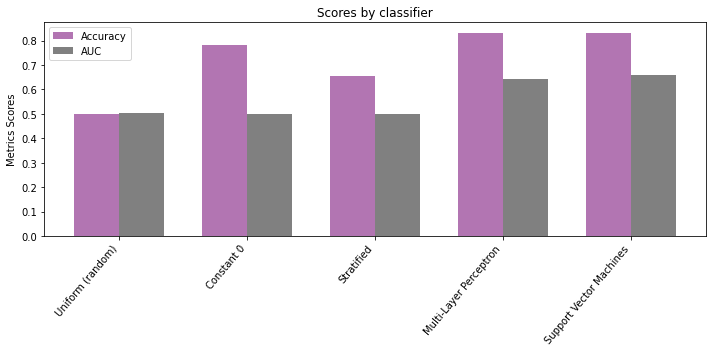

In [ ]:
import matplotlib.pyplot as plt

classifiers = list((classifiers_accuracy.keys()))
accuracy_values = list(classifiers_accuracy.values())
auc_values = list(classifiers_auc.values())

x = np.arange (len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, accuracy_values, width, color = (0.5,0.1,0.5,0.6), label='Accuracy')
rects2 = ax.bar(x + width/2, auc_values, width, color='gray', label='AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics Scores')
ax.set_title('Scores by classifier')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=50, ha='right')
ax.legend()


fig.tight_layout()

plt.show()

### Εντοπισμός των βέλτιστων υπερπαραμέτρων 

#### **Multi-Layer Perceptron**

##### Αναζήτηση βέλτιστων υπερπαραμέτρων

Για τον ταξινομητή Multi-Layer Perceptron θα εντοπίσουμε τις βέλτιστες υπερπαραμέτρους που αφορούν τη συνάρτηση ενεργοποίησης και το μέγεθος των hidden layers, καθώς και τις υπερπαραμέτρους των μετασχηματιστών του pipeline. 

Πραγματοποιήθηκαν δοκιμές για διαφορετικές αρχιτεκτονικές, με την top down προσέγγιση, ξεκινώντας αφαιρώντας μετασχηματιστές από το αρχικό pipeline (Selector VarianceThreshold, StandardScaler, RandomOverSampling, PCA, ταξινομητής MLP).

Τα διάφορα pipelines που δοκιμάστηκαν για την βελτιστοποίηση των παραμέτρων με Optuna, ήταν τα εξής: 
 
* Selector VarianceThreshold, StandardScaler, RandomOverSampling, PCA, ταξινομητής MLP: βέλτιστο AUC γύρω στο 78%
MLP: βέλτιστο AUC γύρω στο 76%
* RandomOverSampling, PCA, ταξινομητής MLP: βέλτιστο AUC γύρω στο 78%
* Selector VarianceThreshold, RandomOverSampling, PCA, ταξινομητής MLP: βέλτιστο AUC γύρω στο 78%
* Selector VarianceThreshold, StandardScaler, RandomOverSampling, ταξινομητής MLP: βέλτιστο AUC γύρω στο 76%
* Selector VarianceThreshold, StandardScaler, ταξινομητής MLP: βέλτιστο AUC γύρω στο 72% (άρα χωρίς το στάδιο εξισορρόπησης του dataset, υπήρχε αρκετή ελάττωση στην επίδοση
* Selector VarianceThreshold, RandomUnderSampling, PCA, ταξινομητής MLP: βέλτιστο AUC γύρω στο 78%

Επομένως, παρατηρήσαμε ότι πολλοί από τους συνδυασμούς δίνουν παρόμοια αποτελέσματα AUC. Συμπεράναμε πως το στάδιο εξισορρόπησης του dataset, είτε με OverSampling, είτε με UnderSampling είναι απαραίτητο, όπως επίσης βοηθητικό είναι και το στάδιο εξαγωγής χαρακτηριστικών με τη μέθοδο PCA. 

Προκειμένου να γίνει η βελτιστοποίηση των υπερπαραμέτρων με σχετικά μικρότερη πολυπλοκότητα, πραγματοποιούμε Stratified Sampling, ώστε να γίνουν οι δοκιμές σε μικρότερα ισορροπημένα υποσύνολα του dataset.

Ο τελικός estimator στον οποίο καταλήξαμε για τον συγκεκριμένο ταξινομητή αποτελείται από τα ακόλουθα στάδια/μετασχηματιστές:

Selector VarianceThreshold, RandomOverSampling, PCA, ταξινομητής MLP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier


split=StratifiedShuffleSplit(n_splits=20,test_size=0.3)
X = np.array(features)
y=np.array(labels)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

def objective(trial):

    
    classifier_name = trial.suggest_categorical("classifier", ["MLP"])

    # Sample hyper parameters
    vthreshold = trial.suggest_float('vthreshold', 0, 3, step=0.03)
    n_components = trial.suggest_int('n_components', 2, 11, step=3)
    activation = trial.suggest_categorical('activation',['identity','logistic', 'tanh','relu'])

    n_layers = trial.suggest_int('n_layers', 1, 2)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 10, 20))


    # Construct the model
    selector= VarianceThreshold(threshold=vthreshold)
    scaler = StandardScaler()
    ros = RandomUnderSampler()
    pca = PCA(n_components=n_components)
    mlp = MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation)
    
    pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('MLP', mlp)])
     
    # Train the model
    pipe_mlp.fit(X_train,y_train)

    # Evaluate the model
    y_pred_test = pipe_mlp.predict(X_test)
    score = roc_auc_score(y_test,y_pred_test)
    print("Test Score:",pipe_mlp.score(X_test,y_test))
    print("Train Score:",pipe_mlp.score(X_train,y_train))
    print("\n=================")
    return score

In [ ]:
import optuna

# depending on the definition of objective
# we can create study object with either minimize or maximize
study = optuna.create_study(direction='maximize')

# start tuning for the hyper-parameters
study.optimize(objective, n_trials=20)

[I 2021-11-29 18:53:57,394] A new study created in memory with name: no-name-6a1f3a88-c28e-4ddb-a969-ed9acf464693
[I 2021-11-29 18:53:59,859] Trial 0 finished with value: 0.7493905375120085 and parameters: {'classifier': 'MLP', 'vthreshold': 1.3499999999999999, 'n_components': 5, 'activation': 'identity', 'n_layers': 2, 'n_units_0': 12, 'n_units_1': 10}. Best is trial 0 with value: 0.7493905375120085.


Test Score: 0.7635548498575632
Train Score: 0.7630370170224263



[I 2021-11-29 18:54:11,544] Trial 1 finished with value: 0.7706550242297017 and parameters: {'classifier': 'MLP', 'vthreshold': 0.06, 'n_components': 8, 'activation': 'logistic', 'n_layers': 1, 'n_units_0': 12}. Best is trial 1 with value: 0.7706550242297017.


Test Score: 0.7842665670387148
Train Score: 0.7866042210813894



[I 2021-11-29 18:54:13,349] Trial 2 finished with value: 0.7628846427081375 and parameters: {'classifier': 'MLP', 'vthreshold': 0.32999999999999996, 'n_components': 8, 'activation': 'identity', 'n_layers': 1, 'n_units_0': 20}. Best is trial 1 with value: 0.7706550242297017.


Test Score: 0.7649792182319152
Train Score: 0.7651885876689983



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test Score: 0.7908046513800028


[I 2021-11-29 18:54:55,797] Trial 3 finished with value: 0.7878847479948499 and parameters: {'classifier': 'MLP', 'vthreshold': 0.75, 'n_components': 11, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 16, 'n_units_1': 20}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.7942798242717184



[I 2021-11-29 18:55:07,832] Trial 4 finished with value: 0.7589525672269304 and parameters: {'classifier': 'MLP', 'vthreshold': 0.69, 'n_components': 5, 'activation': 'logistic', 'n_layers': 1, 'n_units_0': 14}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7651893709428852
Train Score: 0.7637575430063946



[I 2021-11-29 18:55:09,973] Trial 5 finished with value: 0.7511163684187938 and parameters: {'classifier': 'MLP', 'vthreshold': 3.0, 'n_components': 5, 'activation': 'identity', 'n_layers': 2, 'n_units_0': 18, 'n_units_1': 13}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7565264091906786
Train Score: 0.7565823050827104



[I 2021-11-29 18:55:24,074] Trial 6 finished with value: 0.7839707846844588 and parameters: {'classifier': 'MLP', 'vthreshold': 0.72, 'n_components': 11, 'activation': 'relu', 'n_layers': 1, 'n_units_0': 16}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7876056601130155
Train Score: 0.7899566683679086



[I 2021-11-29 18:55:26,122] Trial 7 finished with value: 0.7506673328890335 and parameters: {'classifier': 'MLP', 'vthreshold': 1.89, 'n_components': 5, 'activation': 'identity', 'n_layers': 1, 'n_units_0': 12}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7581375799747817
Train Score: 0.7573428602880102



[I 2021-11-29 18:55:28,676] Trial 8 finished with value: 0.7676944681993236 and parameters: {'classifier': 'MLP', 'vthreshold': 2.16, 'n_components': 11, 'activation': 'identity', 'n_layers': 2, 'n_units_0': 16, 'n_units_1': 16}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7784056414327745
Train Score: 0.7812803346442904



[I 2021-11-29 18:55:40,255] Trial 9 finished with value: 0.7600311950802253 and parameters: {'classifier': 'MLP', 'vthreshold': 2.25, 'n_components': 5, 'activation': 'relu', 'n_layers': 1, 'n_units_0': 16}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7714939522719844
Train Score: 0.7711829635634013

Test Score: 0.6904917573436697


[I 2021-11-29 18:55:45,388] Trial 10 finished with value: 0.7036360187673827 and parameters: {'classifier': 'MLP', 'vthreshold': 1.1099999999999999, 'n_components': 2, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 10, 'n_units_1': 20}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.6889829575590181



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[I 2021-11-29 18:56:25,149] Trial 11 finished with value: 0.7845222934624049 and parameters: {'classifier': 'MLP', 'vthreshold': 0.78, 'n_components': 11, 'activation': 'relu', 'n_layers': 2, 'n_units_0': 18, 'n_units_1': 20}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7980665950590763
Train Score: 0.8033664575139852

Test Score: 0.7916686125251016


[I 2021-11-29 18:57:08,971] Trial 12 finished with value: 0.7841819325443792 and parameters: {'classifier': 'MLP', 'vthreshold': 0.8999999999999999, 'n_components': 11, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 19, 'n_units_1': 20}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.7955907812703273



[I 2021-11-29 18:57:43,820] Trial 13 finished with value: 0.7842458249962576 and parameters: {'classifier': 'MLP', 'vthreshold': 0.36, 'n_components': 11, 'activation': 'relu', 'n_layers': 2, 'n_units_0': 18, 'n_units_1': 17}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7851305281838136
Train Score: 0.7906271578252124

Test Score: 0.7853406808947836


[I 2021-11-29 18:58:20,420] Trial 14 finished with value: 0.7743845096692127 and parameters: {'classifier': 'MLP', 'vthreshold': 1.5899999999999999, 'n_components': 8, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 14, 'n_units_1': 18}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.7863740530587329



[I 2021-11-29 18:58:56,910] Trial 15 finished with value: 0.7846866613332191 and parameters: {'classifier': 'MLP', 'vthreshold': 1.26, 'n_components': 11, 'activation': 'relu', 'n_layers': 2, 'n_units_0': 18, 'n_units_1': 20}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7944706486713679
Train Score: 0.7982927537102085

Test Score: 0.7824685938448606


[I 2021-11-29 18:59:26,109] Trial 16 finished with value: 0.7741009115391897 and parameters: {'classifier': 'MLP', 'vthreshold': 1.47, 'n_components': 8, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 17, 'n_units_1': 14}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.7846027600148108



[I 2021-11-29 18:59:34,345] Trial 17 finished with value: 0.7035518750868418 and parameters: {'classifier': 'MLP', 'vthreshold': 1.14, 'n_components': 2, 'activation': 'relu', 'n_layers': 2, 'n_units_0': 20, 'n_units_1': 18}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7022136085555504
Train Score: 0.7024127613157605

Test Score: 0.7949843552981833


[I 2021-11-29 19:00:14,255] Trial 18 finished with value: 0.7834577852951027 and parameters: {'classifier': 'MLP', 'vthreshold': 1.7999999999999998, 'n_components': 11, 'activation': 'tanh', 'n_layers': 2, 'n_units_0': 14, 'n_units_1': 18}. Best is trial 3 with value: 0.7878847479948499.


Train Score: 0.7994035646021596



[I 2021-11-29 19:00:43,620] Trial 19 finished with value: 0.771935954906985 and parameters: {'classifier': 'MLP', 'vthreshold': 0.42, 'n_components': 8, 'activation': 'logistic', 'n_layers': 2, 'n_units_0': 15, 'n_units_1': 12}. Best is trial 3 with value: 0.7878847479948499.


Test Score: 0.7737589314902162
Train Score: 0.7758563751538623



Το 3o trial έδωσε το μέγιστο αποτέλεσμα AUC με τις βέλτιστες παραμέτρους να είναι οι ακόλουθες: 'vthreshold': 0.69, 'n_components': 5, 'activation': 'logistic', 'n_layers': 1, 'n_units_0': 14.


##### Βέλτιστο μοντέλο

In [ ]:
opt_classifiers_accuracy = {}
opt_classifiers_auc = {}
opt_classifiers_time = {}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
import time 

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

selector= VarianceThreshold(threshold=0.75)
scaler = StandardScaler()
ros = RandomUnderSampler()
pca = PCA(n_components=11)
mlp = MLPClassifier(hidden_layer_sizes=(200), activation='tanh')
    
pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('MLP', mlp)])
     
start_time = time.time()
pipe_mlp.fit(X_train,y_train)
preds = pipe_mlp.predict(X_test)

opt_classifiers_time['Optimized Multi-Layer Perceptron'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

opt_classifiers_accuracy['Optimized Multi-Layer Perceptron'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
opt_classifiers_auc['Optimized Multi-Layer Perceptron'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds))
print("Multi-Layer Perceptron AUC Score:",metrics.auc(fpr, tpr))


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Συνολικός χρόνος fit και predict: 165.95591139793396 seconds 

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     33398
           1       0.53      0.76      0.62      9428

    accuracy                           0.80     42826
   macro avg       0.72      0.78      0.74     42826
weighted avg       0.84      0.80      0.81     42826

Multi-Layer Perceptron AUC Score: 0.7833143730860899


#### **Support Vector Machines (SVM)**

##### Αναζήτηση βέλτιστων υπερπαραμέτρων

Για τον ταξινομητή Support Vector Machine θα εντοπίσουμε τις βέλτιστες υπερπαραμέτρους που αφορούν την παράμετρο κανονικοποίησης C, τη συνάρτηση πυρήνα, τον συντελεστή gamma, καθώς και τις υπερπαραμέτρους των μετασχηματιστών του pipeline. 

Πραγματοποιήθηκαν δοκιμές για διαφορετικές αρχιτεκτονικές, με την top down προσέγγιση, ξεκινώντας αφαιρώντας μετασχηματιστές από το αρχικό pipeline (Selector VarianceThreshold, StandardScaler, RandomUnderSampling, PCA, ταξινομητής SVM).

Τα pipelines που δοκιμάστηκαν για την βελτιστοποίηση των παραμέτρων με Optuna, ήταν τα εξής: 
* Selector VarianceThreshold, StandardScaler, RandomOverSampling, PCA, ταξινομητής SVM
* Selector VarianceThreshold, StandardScaler, RandomUnderSampling, PCA, ταξινομητής SVM
* Selector VarianceThreshold, RandomUnderSampling, PCA, ταξινομητής SVM
* StandardScaler, RandomUnderSampling, PCA, ταξινομητής SVM

με διάφορες υπερπαραμέτρους για τον κάθε μετασχηματιστή και τον ταξινομητή.
Παρατηρήσαμε πως η αφαίερεση των επιμέρους μετασχηματιστών ελάττωσε (αν και λίγο) την επίδοση του μοντέλου. 

Προκειμένου να γίνει η βελτιστοποίηση των υπερπαραμέτρων με σχετικά μικρότερη πολυπλοκότητα, πραγματοποιούμε Stratified Sampling, ώστε να γίνουν οι δοκιμές σε μικρότερα ισορροπημένα υποσύνολα του dataset.

Επειδή το dataset έχει σχετικά μεγάλο πλήθος δειγμάτων, και έχοντας δοκιμάσει και τις δύο μεθόδους για εξισορρόπηση στην βελτιστοποίηση του MLP παραπάνω, όπου δεν υπήρξε μεγάλη διαφορά στην επίδοση είτε με OverSampling, είτε με UnderSampling, θεωρήσαμε πως επιλέγοντας UnderSampling δεν θα χαθεί σημαντικά πολλή πληροφορία, αλλά θα ελαττωθεί η πολυπλοκότητα του μοντέλου.

Επομένως, ο τελικός estimator στον οποίο καταλήξαμε για τον συγκεκριμένο ταξινομητή αποτελείται από τα ακόλουθα στάδια/μετασχηματιστές:

Selector VarianceThreshold, StandardScaler, RandomUnderSampling, PCA, ταξινομητής SVM με τις υπερπαραμέτρους που φαίνονται στη συνέχεια.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [ ]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomUnderSampler()
pca = PCA()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
split=StratifiedShuffleSplit(n_splits=20,test_size=0.3)
X = np.array(features)
y=np.array(labels)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

def objective(trial):

        # Sample hyper parameters
    classifier_name = trial.suggest_categorical("classifier", ["SVC"])


    # Sample hyper parameters
    vthreshold = trial.suggest_float('vthreshold', 0, 0.025, step=0.005)
    n_components = trial.suggest_int('n_components', 2, 11, step=3)
    C = trial.suggest_loguniform('C', 1e-10, 1)
    kernel = trial.suggest_categorical('kernel',['rbf','sigmoid'])
    gamma = trial.suggest_loguniform('gamma',0.001,10000)

    # Construct the model
    selector= VarianceThreshold(threshold=vthreshold)
    scaler = StandardScaler()
    ros = RandomUnderSampler()
    pca = PCA(n_components=n_components)
    svc = SVC(C=C, kernel=kernel, degree=degree,gamma=gamma)
    
    pipe_svc = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('SVC', svc)])
     
    # Train the model
    pipe_svc.fit(X_train,y_train)

    # Evaluate the model
    y_pred_test = pipe_svc.predict(X_test)
    score = roc_auc_score(y_test,y_pred_test)
    #loss = mean_squared_error(y_test,y_pred_test)
    print("Test Score:",pipe_svc.score(X_test,y_test))
    print("Train Score:",pipe_svc.score(X_train,y_train))
    print("\n=================")
    return score

In [ ]:
import optuna

# depending on the definition of objective
# we can create study object with either minimize or maximize
study = optuna.create_study(direction='maximize')

# start tuning for the hyper-parameters
study.optimize(objective, n_trials=50)

[I 2021-11-29 13:11:23,667] A new study created in memory with name: no-name-a8479ede-160b-4774-b95d-f9dd8c7b2575


Test Score: 0.8062625507869051


[I 2021-11-29 13:16:27,481] Trial 0 finished with value: 0.7078713882139176 and parameters: {'classifier': 'SVC', 'vthreshold': 0.02, 'n_components': 5, 'C': 8.428356572557852e-06, 'kernel': 'rbf', 'degree': 12, 'gamma': 0.004943692625119464}. Best is trial 0 with value: 0.7078713882139176.


Train Score: 0.8090405996377356

Test Score: 0.7631578947368421


[I 2021-11-29 13:20:50,328] Trial 1 finished with value: 0.7363652922148358 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 5, 'C': 8.443399680115892e-09, 'kernel': 'sigmoid', 'degree': 30, 'gamma': 59.40110349798579}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7664495081409429

Test Score: 0.7882828188483632


[I 2021-11-29 13:25:12,511] Trial 2 finished with value: 0.5244306969742643 and parameters: {'classifier': 'SVC', 'vthreshold': 0.025, 'n_components': 2, 'C': 3.082576504225657e-08, 'kernel': 'rbf', 'degree': 49, 'gamma': 0.0013107684331578318}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7891660912466101

Test Score: 0.7459253724373044


[I 2021-11-29 13:31:59,578] Trial 3 finished with value: 0.7277462569478876 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 5, 'C': 2.3940173363473984e-10, 'kernel': 'sigmoid', 'degree': 21, 'gamma': 6.560153754797992}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7510882944549521

Test Score: 0.8020361462662868


[I 2021-11-29 13:37:04,042] Trial 4 finished with value: 0.7136746949961372 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 5, 'C': 2.3751311636144082e-08, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.007376935460765784}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.8048075094819218

Test Score: 0.6774155886610937


[I 2021-11-29 13:40:46,155] Trial 5 finished with value: 0.6786785581695184 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 8, 'C': 0.059834432563043764, 'kernel': 'sigmoid', 'degree': 45, 'gamma': 0.054839442191036564}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.6816876319713391

Test Score: 0.7214309064586933


[I 2021-11-29 13:44:42,997] Trial 6 finished with value: 0.7243140577044114 and parameters: {'classifier': 'SVC', 'vthreshold': 0.025, 'n_components': 8, 'C': 0.00015030631211362372, 'kernel': 'sigmoid', 'degree': 43, 'gamma': 368.32609559154594}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7242086723308014

Test Score: 0.7804371176388175


[I 2021-11-29 13:49:26,996] Trial 7 finished with value: 0.5019534517336973 and parameters: {'classifier': 'SVC', 'vthreshold': 0.02, 'n_components': 2, 'C': 1.3224147252495189e-09, 'kernel': 'sigmoid', 'degree': 37, 'gamma': 0.0035173806479104203}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7801995456683379

Test Score: 0.5739504039602111


[I 2021-11-29 13:51:53,300] Trial 8 finished with value: 0.5738603265618368 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 5, 'C': 0.0306766215551204, 'kernel': 'sigmoid', 'degree': 28, 'gamma': 73.6989834989272}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.5728882083921263

Test Score: 0.8202727315182365


[I 2021-11-29 13:58:23,263] Trial 9 finished with value: 0.6664198366348205 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 11, 'C': 2.5205815341226017e-07, 'kernel': 'rbf', 'degree': 49, 'gamma': 0.0011717488190980492}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.8218599577691715

Test Score: 0.7475365432214075


[I 2021-11-29 14:03:23,371] Trial 10 finished with value: 0.7327323579434785 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 11, 'C': 5.680552223410384e-06, 'kernel': 'sigmoid', 'degree': 31, 'gamma': 7033.594042887964}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7525193391175559

Test Score: 0.7473964414140942


[I 2021-11-29 14:08:23,324] Trial 11 finished with value: 0.7327185238883553 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 11, 'C': 2.340279737442296e-05, 'kernel': 'sigmoid', 'degree': 31, 'gamma': 5228.050876997734}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.7522491418735677

Test Score: 0.6009900527716807


[I 2021-11-29 14:11:58,442] Trial 12 finished with value: 0.6152984058849125 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 8, 'C': 0.0006761739352521318, 'kernel': 'sigmoid', 'degree': 21, 'gamma': 8725.714177305135}. Best is trial 1 with value: 0.7363652922148358.


Train Score: 0.5988571657309836

Test Score: 0.7628776911222155


[I 2021-11-29 14:17:03,927] Trial 13 finished with value: 0.7405184983548597 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 5.855991529045677e-07, 'kernel': 'sigmoid', 'degree': 35, 'gamma': 254.7299328821083}. Best is trial 13 with value: 0.7405184983548597.


Train Score: 0.7657590040729733

Test Score: 0.7600990052771681


[I 2021-11-29 14:25:39,594] Trial 14 finished with value: 0.7396866730282163 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 8, 'C': 4.084041974855382e-07, 'kernel': 'sigmoid', 'degree': 36, 'gamma': 4.015423029285133}. Best is trial 13 with value: 0.7405184983548597.


Train Score: 0.7638075795330591

Test Score: 0.7645355625087563


[I 2021-11-29 14:35:41,002] Trial 15 finished with value: 0.7397953492267892 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 4.0863136478894745e-07, 'kernel': 'sigmoid', 'degree': 36, 'gamma': 0.5990272571683336}. Best is trial 13 with value: 0.7405184983548597.


Train Score: 0.767099982987581

Test Score: 0.7632512959417177


[I 2021-11-29 14:45:44,629] Trial 16 finished with value: 0.7405300505367015 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 5.90311167043501e-07, 'kernel': 'sigmoid', 'degree': 39, 'gamma': 0.22215754401335142}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.7660191940116284

Test Score: 0.5962732919254659


[I 2021-11-29 14:52:01,133] Trial 17 finished with value: 0.599122707634148 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 0.003409844626449976, 'kernel': 'sigmoid', 'degree': 22, 'gamma': 0.540486110757205}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.5965554855044182

Test Score: 0.7260309157988138


[I 2021-11-29 14:58:36,407] Trial 18 finished with value: 0.7400728094667897 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 1.2338672615308837e-06, 'kernel': 'rbf', 'degree': 40, 'gamma': 0.09663249963585045}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.732014370490458

Test Score: 0.7416756176154672


[I 2021-11-29 15:02:43,935] Trial 19 finished with value: 0.7359670973930462 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 8, 'C': 7.632614969908742e-05, 'kernel': 'sigmoid', 'degree': 15, 'gamma': 590.766465124028}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.74371291042461

Test Score: 0.7600523046747303


[I 2021-11-29 15:08:56,236] Trial 20 finished with value: 0.7402268422606346 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 2.499203906057016e-09, 'kernel': 'sigmoid', 'degree': 43, 'gamma': 22.49631510633594}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.7632471704344171

Test Score: 0.7618736281698034


[I 2021-11-29 15:14:31,213] Trial 21 finished with value: 0.7399125816567481 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 1.4639643868446368e-10, 'kernel': 'sigmoid', 'degree': 43, 'gamma': 44.140796869374206}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.765128543837001

Test Score: 0.760332508289357


[I 2021-11-29 15:21:15,681] Trial 22 finished with value: 0.7403305262663402 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 2.8487472144563953e-09, 'kernel': 'sigmoid', 'degree': 39, 'gamma': 15.92832165730599}. Best is trial 16 with value: 0.7405300505367015.


Train Score: 0.7639276671970539

Test Score: 0.7604025591930136


[I 2021-11-29 15:30:35,282] Trial 23 finished with value: 0.7406415068757396 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 8, 'C': 5.353505643026747e-08, 'kernel': 'sigmoid', 'degree': 37, 'gamma': 0.7337533264223236}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7631070681597566

Test Score: 0.7616401251576145


[I 2021-11-29 15:39:55,595] Trial 24 finished with value: 0.73983884763457 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 8, 'C': 9.285146450296878e-08, 'kernel': 'sigmoid', 'degree': 33, 'gamma': 0.5822941412967914}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7650785073103366

Test Score: 0.7826787465558306


[I 2021-11-29 15:48:34,949] Trial 25 finished with value: 0.7314387373213891 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 8, 'C': 2.130647993295345e-06, 'kernel': 'sigmoid', 'degree': 24, 'gamma': 0.10780932448537298}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7872847178440261

Test Score: 0.3331620977910615


[I 2021-11-29 15:54:27,080] Trial 26 finished with value: 0.5626141505918876 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 8, 'C': 7.19908597840206e-08, 'kernel': 'rbf', 'degree': 35, 'gamma': 1.9458602834090315}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.334484173446616

Test Score: 0.7614299724466446


[I 2021-11-29 15:59:29,830] Trial 27 finished with value: 0.7399321203950746 and parameters: {'classifier': 'SVC', 'vthreshold': 0.02, 'n_components': 11, 'C': 1.4891379769270968e-06, 'kernel': 'sigmoid', 'degree': 40, 'gamma': 365.5628627484814}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7648983758143445

Test Score: 0.6659505907626209


[I 2021-11-29 16:02:43,162] Trial 28 finished with value: 0.6653585894199475 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 11, 'C': 0.3347670465594236, 'kernel': 'sigmoid', 'degree': 29, 'gamma': 0.035473079701389534}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.6645651325467591

Test Score: 0.31233362910381546


[I 2021-11-29 16:08:35,972] Trial 29 finished with value: 0.5513468950637536 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 8, 'C': 1.3018125807317573e-05, 'kernel': 'rbf', 'degree': 26, 'gamma': 1.6702190399323984}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.31207781680626856

Test Score: 0.7633680474478121


[I 2021-11-29 16:16:12,415] Trial 30 finished with value: 0.7094764163048726 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 2, 'C': 4.003607021583342e-06, 'kernel': 'sigmoid', 'degree': 47, 'gamma': 0.27720027007203907}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7673101363995717

Test Score: 0.7608929155186102


[I 2021-11-29 16:23:16,795] Trial 31 finished with value: 0.7403098465913731 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 3.242740676418443e-09, 'kernel': 'sigmoid', 'degree': 39, 'gamma': 12.936886160467116}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7641578352197104

Test Score: 0.7600990052771681


[I 2021-11-29 16:28:24,136] Trial 32 finished with value: 0.7405988637737296 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 1.0870343184599001e-08, 'kernel': 'sigmoid', 'degree': 33, 'gamma': 153.43260170719824}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7635473895944039

Test Score: 0.7608929155186102


[I 2021-11-29 16:33:28,464] Trial 33 finished with value: 0.740461878382292 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 1.6307884256829342e-08, 'kernel': 'sigmoid', 'degree': 33, 'gamma': 202.51962232570042}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7642278863570406

Test Score: 0.7618035772661468


[I 2021-11-29 16:38:26,548] Trial 34 finished with value: 0.7405137917928623 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 1.0862147641929805e-07, 'kernel': 'sigmoid', 'degree': 34, 'gamma': 2121.1439747691434}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7652886607223273

Test Score: 0.7498482230420772


[I 2021-11-29 16:42:53,162] Trial 35 finished with value: 0.7286657217595497 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 8, 'C': 7.748357050440564e-10, 'kernel': 'sigmoid', 'degree': 17, 'gamma': 1080.0962830054746}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7543606832988081

Test Score: 0.7817680848082941


[I 2021-11-29 16:47:57,789] Trial 36 finished with value: 0.7301705695834676 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 5, 'C': 1.2641064948652518e-08, 'kernel': 'rbf', 'degree': 9, 'gamma': 0.019041848915519948}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7867042941347183

Test Score: 0.7604492597954514


[I 2021-11-29 16:53:21,758] Trial 37 finished with value: 0.7401773535387807 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 11, 'C': 4.121589525632754e-08, 'kernel': 'sigmoid', 'degree': 27, 'gamma': 60.97478687825127}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7640777767770472

Test Score: 0.747653294727502


[I 2021-11-29 17:01:04,802] Trial 38 finished with value: 0.7282842871224595 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 8, 'C': 4.799549936741091e-10, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 5.898054983514145}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7520590030722427

Test Score: 0.7629243917246532


[I 2021-11-29 17:05:10,458] Trial 39 finished with value: 0.7361015184540091 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 5, 'C': 4.899680188689172e-07, 'kernel': 'sigmoid', 'degree': 46, 'gamma': 159.55930904339317}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.7663294204769482

Test Score: 0.3116564703684678


[I 2021-11-29 17:11:44,374] Trial 40 finished with value: 0.5511406679889832 and parameters: {'classifier': 'SVC', 'vthreshold': 0.025, 'n_components': 11, 'C': 5.104866262619739e-09, 'kernel': 'rbf', 'degree': 38, 'gamma': 1.531756971450131}. Best is trial 23 with value: 0.7406415068757396.


Train Score: 0.3118976853102765

Test Score: 0.7622705832905244


[I 2021-11-29 17:16:41,556] Trial 41 finished with value: 0.7409653234190561 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 1.8375128226279687e-07, 'kernel': 'sigmoid', 'degree': 34, 'gamma': 1926.7761209852831}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7650084561730063

Test Score: 0.7610797179283613


[I 2021-11-29 17:21:39,777] Trial 42 finished with value: 0.7405056624209425 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 3.398449761584018e-08, 'kernel': 'sigmoid', 'degree': 41, 'gamma': 2484.5082850922026}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7645381128223603

Test Score: 0.7668238920282071


[I 2021-11-29 17:31:42,669] Trial 43 finished with value: 0.7397425805104478 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 11, 'C': 1.861279563518964e-07, 'kernel': 'sigmoid', 'degree': 33, 'gamma': 0.21309796598095712}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7695517727941398

Test Score: 0.7604025591930136


[I 2021-11-29 17:36:41,410] Trial 44 finished with value: 0.74056549098028 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 11, 'C': 7.070505415671662e-07, 'kernel': 'sigmoid', 'degree': 30, 'gamma': 1406.6047673616258}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7635874188157354

Test Score: 0.7608462149161724


[I 2021-11-29 17:41:38,171] Trial 45 finished with value: 0.7401278648169266 and parameters: {'classifier': 'SVC', 'vthreshold': 0.01, 'n_components': 11, 'C': 3.067334634036623e-05, 'kernel': 'sigmoid', 'degree': 30, 'gamma': 846.3953693846381}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7644080178530327

Test Score: 0.7525101573810302


[I 2021-11-29 17:44:56,478] Trial 46 finished with value: 0.713117262551321 and parameters: {'classifier': 'SVC', 'vthreshold': 0.015, 'n_components': 2, 'C': 1.1503231117174043e-08, 'kernel': 'sigmoid', 'degree': 32, 'gamma': 2666.099289875076}. Best is trial 41 with value: 0.7409653234190561.


Train Score: 0.7559218229307394

Test Score: 0.7607528137112969


[I 2021-11-29 17:49:31,458] Trial 47 finished with value: 0.7412462112294932 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 8, 'C': 4.128729019043446e-06, 'kernel': 'sigmoid', 'degree': 29, 'gamma': 123.37047292043242}. Best is trial 47 with value: 0.7412462112294932.


Train Score: 0.7640477548610486

Test Score: 0.707000420305422


[I 2021-11-29 17:53:10,082] Trial 48 finished with value: 0.69700573762279 and parameters: {'classifier': 'SVC', 'vthreshold': 0.005, 'n_components': 8, 'C': 0.00028197968611368704, 'kernel': 'sigmoid', 'degree': 25, 'gamma': 4322.520907163561}. Best is trial 47 with value: 0.7412462112294932.


Train Score: 0.7055650624956218

Test Score: 0.7471862887031243


[I 2021-11-29 17:57:21,633] Trial 49 finished with value: 0.7278707634439953 and parameters: {'classifier': 'SVC', 'vthreshold': 0.0, 'n_components': 5, 'C': 5.498862918722034e-06, 'kernel': 'sigmoid', 'degree': 28, 'gamma': 92.38041291204921}. Best is trial 47 with value: 0.7412462112294932.


Train Score: 0.75166871816426



Το 47o trial έδωσε το μέγιστο αποτέλεσμα AUC 74.12% με τις βέλτιστες υπερπαραμέτρους να είναι οι ακόλουθες: 'vthreshold': 0.005, 'n_components': 8, 'C': 4.128729019043446e-06, 'kernel': 'sigmoid', 'gamma': 123.37047292043242

##### Βέλτιστο μοντέλο

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import time 

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

selector= VarianceThreshold(threshold=0.005)
scaler = StandardScaler()
ros = RandomUnderSampler()
pca = PCA(n_components=8)
svc = SVC(C=4.128729019043446e-06, kernel='sigmoid',gamma=123.3704729204324)
    
pipe_svc = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('SVC', svc)])
     
start_time = time.time()
pipe_svc.fit(X_train,y_train)
preds = pipe_svc.predict(X_test)

opt_classifiers_time['Optimized Support Vector Machines'] = (time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time),'\n')

opt_classifiers_accuracy['Optimized Support Vector Machines'] = accuracy_score(y_test, preds)

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
opt_classifiers_auc['Oprimized Support Vector Machines'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, preds))
print("Support Vector Machines AUC Score:",metrics.auc(fpr, tpr))


Συνολικός χρόνος fit και predict: 113.91197299957275 seconds 

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     33340
           1       0.48      0.71      0.57      9486

    accuracy                           0.76     42826
   macro avg       0.69      0.74      0.70     42826
weighted avg       0.81      0.76      0.78     42826

Support Vector Machines AUC Score: 0.7437557333568073


### Αποτελέσματα της βελτιστοποίησης

Παρακάτω φαίνεται ο αναλυτικός πίνακας των μετρικών "Accuracy" και "AUC" των δύο ταξινομητών, καθώς και των χρόνων που χρειάστηκαν οι ταξινομητές για τις διαδικασίες του fit και του predict.

In [ ]:
print("{:<40} {:<30} {:<25} {:<30}".format('Classifier', 'Accuracy', 'AUC', 'Time'))
label=[]
label2=[]
label3=[]
time=[]
num_ac=[]
num_auc=[]
columns=len(classifiers_accuracy)+len(opt_classifiers_accuracy)
for i in range (columns):
  for k, v in classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for k, v in opt_classifiers_accuracy.items():
      label.append(k)
      num_ac.append(v)
  for m, l in classifiers_auc.items():
      label2.append(m)
      num_auc.append(l) 
  for m, l in opt_classifiers_auc.items():
      label2.append(m)
      num_auc.append(l)
  for t,r in classifiers_time.items():
      label3.append(t)
      time.append(r)
  for t,r in opt_classifiers_time.items():
      label3.append(t)
      time.append(r)
  print("{:<40} {:<30} {:<25} {:<30}".format(label[i], num_ac[i], num_auc[i], time[i]))

Classifier                               Accuracy                       AUC                       Time                          
Uniform (random)                         0.501424368374352              0.5034641792163604        0.005059719085693359          
Constant 0                               0.7799000607107832             0.5                       0.004149198532104492          
Stratified                               0.6563769672628776             0.5008794981647146        0.007112026214599609          
Multi-Layer Perceptron                   0.8324849390557139             0.6408167338143572        97.21064019203186             
Support Vector Machines                  0.8327651426703404             0.6575588733417951        381.1934552192688             
Optimized Support Vector Machines        0.7647924158221641             0.7437557333568073        113.91191697120667            
Optimized Multi-Layer Perceptron         0.7973894363237286             0.7833143730860899       

Παρατηρούμε ότι οι out of the box ταξινομητές SVM και MLP δίνουν μεταξύ τους παρόμοιο Accuracy 83% και παρόμοιες τιμές AUC 65.7% και 64% αντίστοιχα. Μετά τη βελτιστοποίηση, η ακρίβεια ελαττώνεται σε 76.5% για το SVM και 79.7% για το MLP, αλλά η μετρική AUC και για τους δύο ταξινομητές αυξάνεται σε 74% από 65.7% για το SVM και σε 78% από 64% για το MLP. 

Παρατηρούμε πως το βελτιστοποιημένο μοντέλο με ταξινομητή το MLP, είναι συγκριτικά αυτό με την καλύτερη επίδοση με βάση τη μετρική AUC.

Παρακάτω φαίνεται το συγκριτικό bar plot για τα αποτελέσματα του Accuracy των out of the box ταξινομητών σε σχέση με τους ταξινομητές με τις βέλτιστες υπερπαραμέτρους.

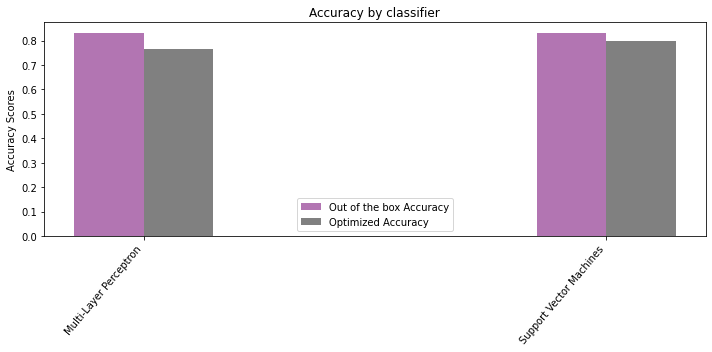

In [ ]:
import matplotlib.pyplot as plt

classifiers_all = list((classifiers_accuracy.keys()))

classifiers=[]
classifiers.append(classifiers_all[3])
classifiers.append(classifiers_all[4])


opt_classifiers = list((opt_classifiers_accuracy.keys()))
plot_labels=classifiers

all_accuracy_values = list(classifiers_accuracy.values())
accuracy_values=[]
accuracy_values.append(all_accuracy_values[3])
accuracy_values.append(all_accuracy_values[4])


opt_accuracy_values=list(opt_classifiers_accuracy.values())

x = np.arange (len(plot_labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, accuracy_values, width, color = (0.5,0.1,0.5,0.6), label='Out of the box Accuracy')
rects2 = ax.bar(x + width/2, opt_accuracy_values, width, color='gray', label='Optimized Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Scores')
ax.set_title('Accuracy by classifier')
ax.set_xticks(x)
ax.set_xticklabels(plot_labels, rotation=50, ha='right')
ax.legend()


fig.tight_layout()

plt.show()

Όπως παρατηρήσαμε και προηγουμένως, η ακρίβεια των μοντέλων ελαττώνεται μετά τη βελτιστοποίηση, όμως αυτό αντισταθμίζεται από την αύξηση της μετρική AUC που παρατηρήσαμε προηγουμένως από τον πίνακα.

###Σχολιασμός αποτελεσμάτων:

Για το συγκεκριμένο πρόβλημα, δεν υπήρξε κάποιος εκ των δύο ταξινομητών που να επιτύχει πολύ υψηλό Accuracy ή πολύ υψηλή τιμή AUC, ωστόσο τα αποτελέσματα ήταν ικανοποιητικά.

Παρατηρήσαμε πως η βελτιστοποίηση, δεν επέφερε πολύ σημαντική βελτίωση στα μοντέλα, ωστόσο υπήρξε μία αισθητή αύξηση στη μετρική AUC.

Τη βέλτιστη επίδοση (με βάση τη μετρική AUC) είχε ο ταξινομητής Multi-Layer Perceptron μετά από τη βελτιστοποίηση των υπερπαραμέτρων. 

Επομένως, μεταξύ των δύο, ο καλύτερος ταξινομητής για το συγκεκριμένο πρόβλημα, φάνηκε να είναι ο Multi-Layer Percetpron με τη βελτιωμένη αρχιτεκτονική, καθώς είχε τη βέλτιστη επίδοση και σχετικά μικρή χρονική πολυπλοκότητα.